# <font color= brown> Bike Sharing Demand Prediction</font>

#### Problem Statement

- A **bike-sharing system** is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider ***BoomBikes*** has recently suffered considerable ***dips in their revenues*** due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful ***business plan to be able to accelerate its revenue*** as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


- In such an attempt, BoomBikes aspires ***to understand the demand for shared bikes among the people after this ongoing quarantine situation ends*** across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want ***to understand the factors affecting the demand for these shared bikes in the American market***.



- The company wants to know:

   - **Which variables** are significant in predicting the demand for shared bikes?
   - **How well those variables describe** the bike demands?
   
   

- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.



### Approach

The following are steps involved in problem solving:
1. Reading, Understanding and Quality Check of the data
2. Visualising the Data
3. Data Preparation
4. Splitting Data into Train-Test and Scaling
5. Building a Linear Model (this is done using two methods: **Backward Selection** and **Recursive Feature Elimination** and two separate models obtained)
6. Residual Analysis
7. Making Predictions
8. Model Evaluation

**Note**: Steps 5 to 8 will be done twice, first time model built using ***Backward Selection*** and second time for model built using ***RFE***)

### Importing Libraries

In [ ]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as mn
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
sns.set(style='whitegrid')

### Assumptions of Linear Regression

We will build a Linear Regression model by making the following assumptions and later, validate them while performing our model building:

1. There is a linear relationship between X (indpendent variables) and Y (response variable)
2. Error terms are normally distributed with mean zero
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

## <font color='darkgreen'>Step 1: Data Understanding and Exploration</font>

In [ ]:
# Reading the 'day.csv'

bikes = pd.read_csv('day.csv')

# Data Understanding and Exploration

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Check the dimensions of dataframe

bikes.shape

(730, 16)

In [ ]:
# Check the column-wise information of dataframe

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Quality Check

In [ ]:
# Check data types of columns
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Inference:
- We observe that all the columns have appropriate data types.

In [ ]:
# Checking for the missing values

bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<AxesSubplot:>

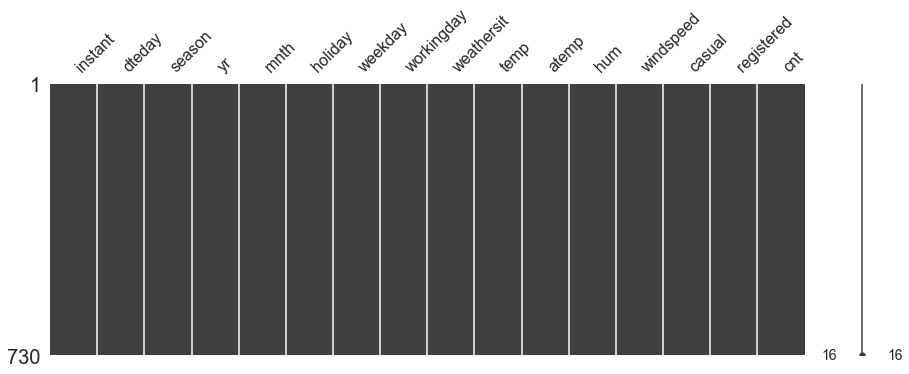

In [ ]:
mn.matrix(bikes,figsize=(15,5))

#### Inferences
- We see above that there are no missing/null values in any of the columns.   
- Hence, we don't need to do any missing value treatment on our dataframe.

In [ ]:
# Check the statistical desciption of numerical columns of dataframe

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Understanding the Data Dictionary and parts of Data Preparation

- **instant**: record index
- **dteday** : date
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

### Handling Categorical Variables

- Before visualising categorical variables, we need to do some modifications to some of them.  
- We need to convert variables '`season`', '`weathersit`', '`mnth`' and '`weekday`' to categorical string values because the numeric values associated with these labels may indicate that there is some order to them, which is actually not the case. Converting them will also help in better visualisation and ease our process of creating dummy variables out of them.

In [ ]:
# First, we will convert 'season' to categorical string values

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

<AxesSubplot:>

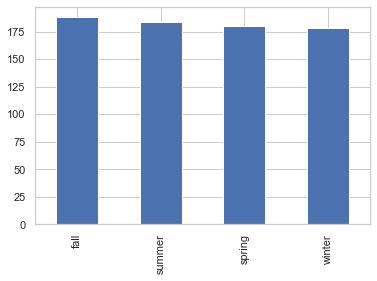

In [ ]:
# Check if the above conversion worked fine

bikes['season'].value_counts().plot(kind ='bar')

In [ ]:
# Similarly, we will convert 'weathersit' to categorical string values

bikes['weathersit'] = bikes['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

Here the names are created as under
- **clear** = 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- **mist**    = 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- **light** = 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- **heavy** = 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:>

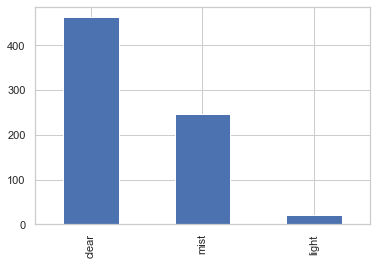

In [ ]:
# Check if the above conversion worked fine

bikes['weathersit'].value_counts().plot(kind ='bar')

#### Inference:
- We observe that there are no bikes are rented when the weather is '**heavy**'.

In [ ]:
# Next, we will convert 'mnth' to categorical string values

bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

<AxesSubplot:>

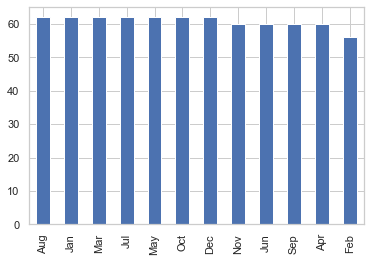

In [ ]:
# Check if the above conversion workd fine

bikes['mnth'].value_counts().plot(kind ='bar')

In [ ]:
# Lastly, we will convert 'weekday' to categorical string values

bikes['weekday'] = bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

<AxesSubplot:>

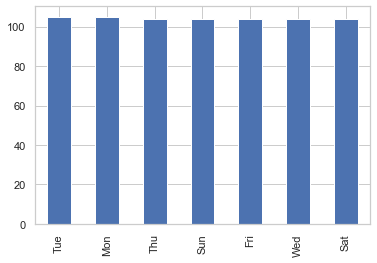

In [ ]:
# Check if the above conversion worked fine

bikes['weekday'].value_counts().plot(kind ='bar')


In [ ]:
# Let's again have a look at first five lines of our dataframe

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping unnecessary variables
By looking at the data dictionary and info() above, we conclude that the following features are of no use and can be conveniently dropped:-

- **`instant`**: This feature gives the index of records. For this, we can use the default index given in pandas dataframe.


- **`dteday`**: This feature gives the date of record. This information is redundant as there are two other features `mnth` (Month) and `yr` (Year)


- **`casual`** & **`registered`**: These two values give count of casual and registered users respectively. However, there is a column `cnt` containing sum of these two columns. As these two will not serve any purpose independently and the same information is already provided in column `cnt`, we drop them.

In [ ]:
# Drop the aforesaid 4 features and view the first five rows of our new dataframe

bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## <font color='darkgreen'>Step 2: Visualising the Data</font>

### Visualising the numerical variables

<Figure size 1080x720 with 0 Axes>

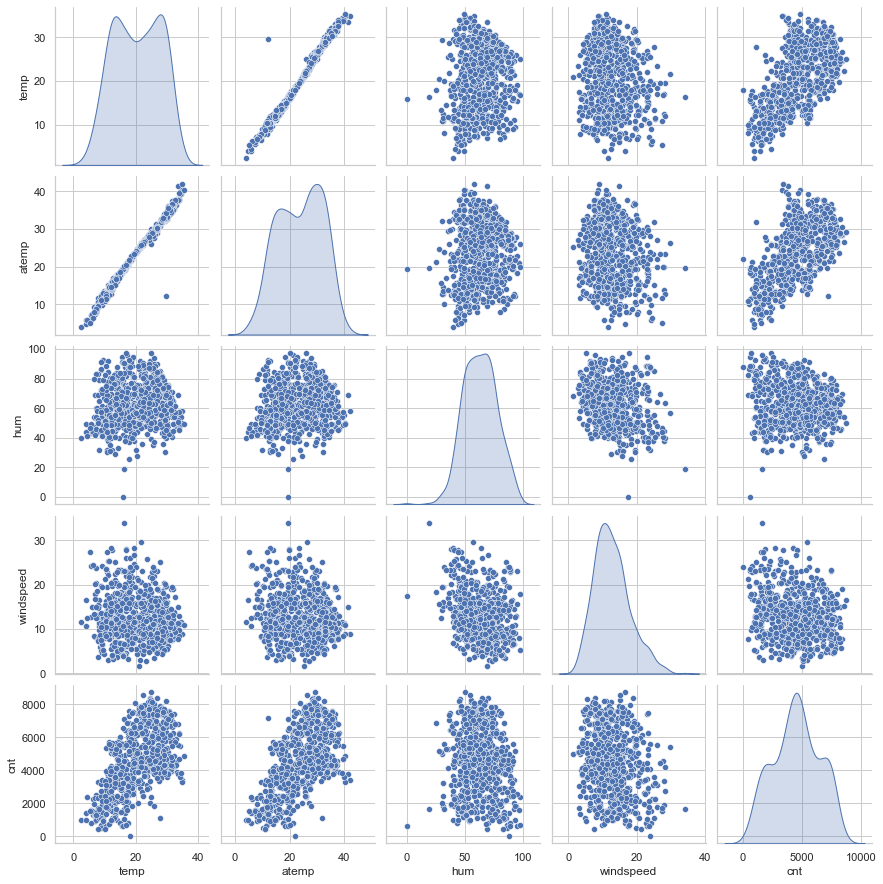

In [ ]:
# Create a list of numerical variables only
num_vars =['temp', 'atemp','hum', 'windspeed', 'cnt']

# Visualise correlations among these numerical variables by plotting multiple scatter plots

plt.figure(figsize=(15,10))
sns.pairplot(bikes[num_vars], diag_kind='kde')
plt.show()

#### Inferences:
- From above scatter plots, we observe that '`cnt`' has positive correlation with '`temp`' and '`atemp`'.
- There is strong collinearity among the variables '`temp`' and '`atemp`'.
- So, we have to remove any one of them.
- As '`temp`' is more sensible, we drop '`atemp`'.

## Outlier Detection for Numeric Variables

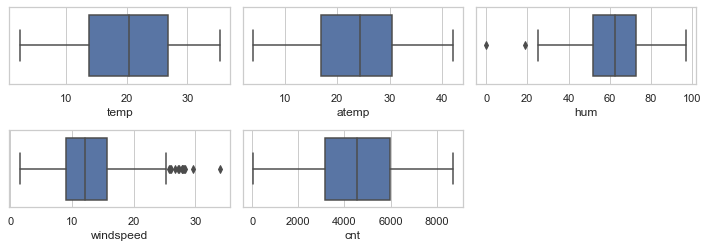

In [ ]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["temp", "atemp", "hum", "windspeed",  "cnt"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(bikes[num_vars][j])
    plt.tight_layout()

#### Inferences:
For 'windspeed', we can see some outliers.'windspeed' is a predictor we will consider 99 percentile for this.

In [ ]:
# Removing variable 'atemp' and look at the first 5 rows

bikes.drop(['atemp'], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


### Visualising Categorical variables

In [ ]:
# Separate out the categorical variables

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

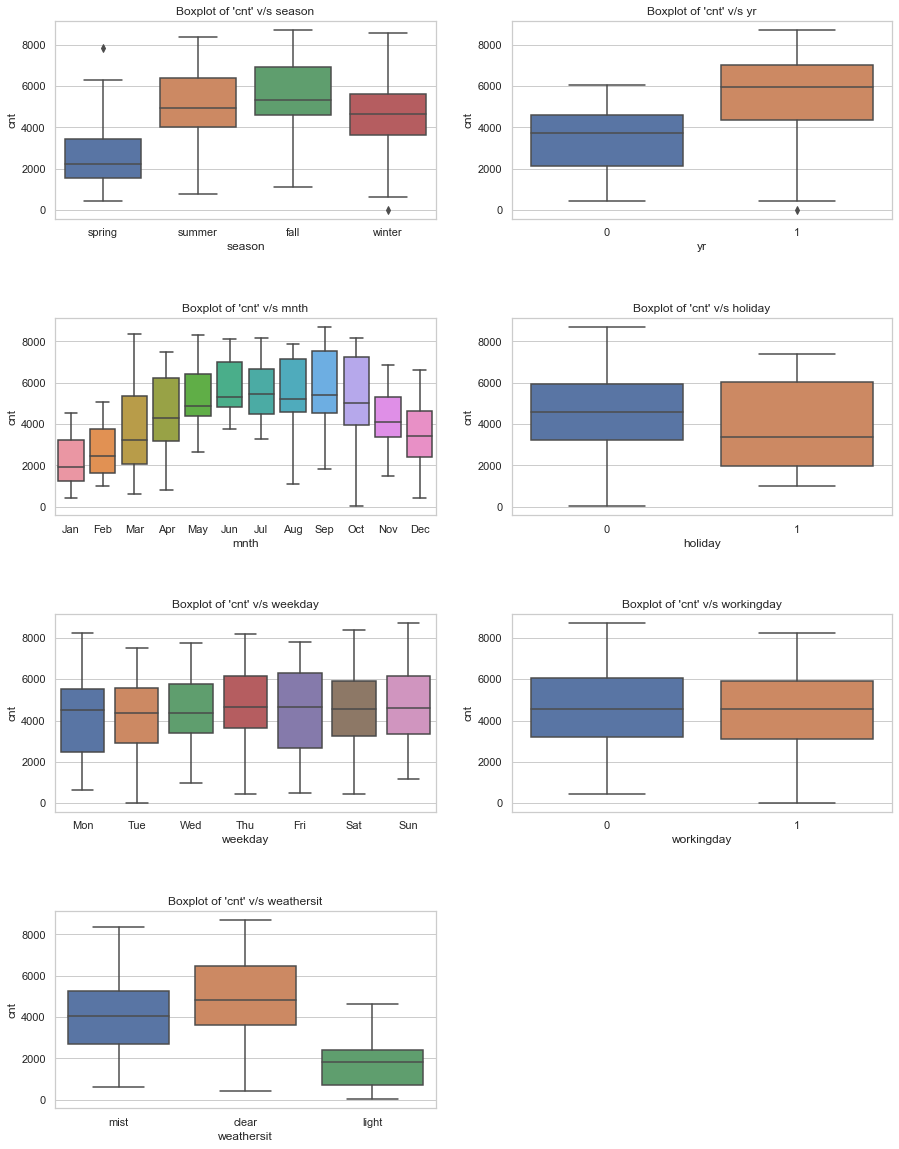

In [ ]:
# Plotting Boxplots for each categorical variables

plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(cat_vars):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot of 'cnt' v/s " + col)
    sns.boxplot(x=col, y='cnt', data=bikes);

#### Inferences:
- More bikes are rented in **fall** and **summer** seasons, and from **May** to **October** months
- More number of bikes were rented in **2019** than in 2018.
- If the weather is **clear** (or having **few clouds**), then more bikes are rented. No bikes are rented in **heavy** weather.


- Rest of the features **`holiday`**, **`workingday`** and **`weekday`** don't show any discernible pattern and hence, it is suggested not to use them for prediction of **`cnt`**.


- Overall, the data is well behaved with very few outliers.
- As we have very less data available, we will not treat outliers.

### Visualising Correlation among variables

In [ ]:
# View the correlation matrix of 'bikes' dataframe

correlation = bikes.corr()
correlation

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.053770,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,-0.098543,-0.235132,1.000000


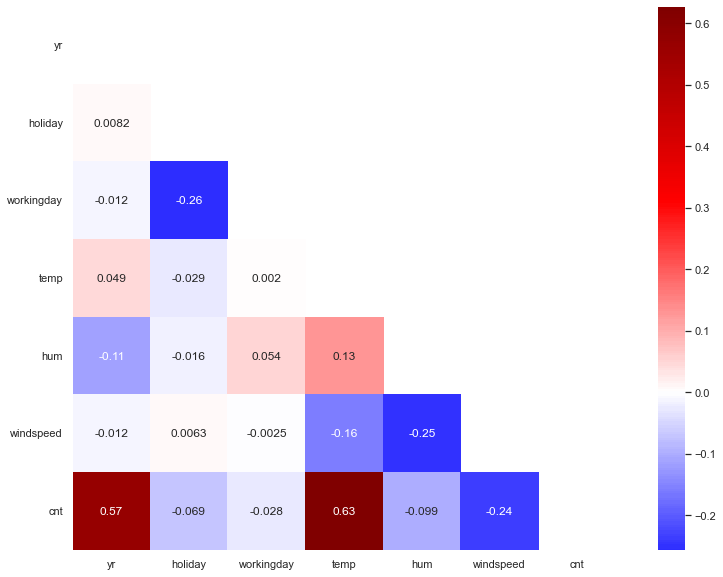

In [ ]:
# To have a better understanding of correlation matrix, we plot the lower half of heatmap of this matrix

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
sns.heatmap(correlation, mask=mask, annot=True, cmap='seismic', square=True, center=0)
plt.yticks(rotation=0);

#### Inferences:
- From above heatmap, we observe our target variable '`cnt`' has:
   - high correlation with variables '`yr`' and '`temp`'
   - low correlation with '`holiday`', '`workingday`' and '`hum`'
  - Thus, while building the model, we'll have to pay attention to multicollinearity.

### Validation of Assumption 1:
#### There is a linear relationship between X (indpendent variables) and Y (response variable)
- From above all visualisations, we observe there is some relation between our response variable (**y**) and many of the independent variables (**Xs**)
- Thus, we can fit a linear model between them.

## <font color='darkgreen'>Step 3: Data Preparation</font>

### Creating Dummy Variables

In [ ]:
# Have a look at our dataframe again

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


#### Inferences:
- Categorical variables having two levels: '`yr`', '`holiday`'and '`workingday`' are already having values as **0**s and **1**s. So, we ***don't need to map them***.  
- However, we need to convert categorical variables having more than two levels to dummy variables, which are '`season`', '`mnth`', '`weekday`', '`weathersit`'

In [ ]:
# Create dummy variables for columns having more than two levels

varlist = ['season', 'mnth', 'weekday', 'weathersit']

In [ ]:
# Creating dummy variables for above four features and then dropping the original feature as the information
# contained in it now becomes redundant

dummy1 = pd.get_dummies(bikes[varlist], drop_first=True)
bikes = pd.concat([bikes, dummy1], axis=1)
bikes = bikes.drop(varlist, axis=1)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking the newly formed columns

bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

#### Inferences:

From above list of columns, we see that we have created:
- 3 dummy variables '`season_spring`','`season_summer`' and '`season_winter`' for 4 seasons
- 11 dummy variables '`mnth_Aug`', '`mnth_Dec`', '`mnth_Feb`', '`mnth_Jan`', '`mnth_Jul`', '`mnth_Jun`', '`mnth_Mar`', '`mnth_May`', '`mnth_Nov`', '`mnth_Oct`' and '`mnth_Sep`' for 12 months
- 6 dummy variables '`weekday_Mon`', '`weekday_Sat`', '`weekday_Sun`', '`weekday_Thu`', '`weekday_Tue`' and '`weekday_Wed`' for 7 weekdays
- 2 dummy variables '`weathersit_light`' and '`weathersit_mist`' for 4 types of weathers (as there are no rentals in heavy weather, number of dummy variables is one less than 3)

In [ ]:
# Check whether we have created any null values while forming dummy variables

bikes.isnull().sum()

yr                  0
holiday             0
workingday          0
temp                0
hum                 0
windspeed           0
cnt                 0
season_spring       0
season_summer       0
season_winter       0
mnth_Aug            0
mnth_Dec            0
mnth_Feb            0
mnth_Jan            0
mnth_Jul            0
mnth_Jun            0
mnth_Mar            0
mnth_May            0
mnth_Nov            0
mnth_Oct            0
mnth_Sep            0
weekday_Mon         0
weekday_Sat         0
weekday_Sun         0
weekday_Thu         0
weekday_Tue         0
weekday_Wed         0
weathersit_light    0
weathersit_mist     0
dtype: int64

#### Now, our data is ready for the model to be built.

## <font color='darkgreen'>Step 4: Splitting Data into Train-Test and Scaling</font>

In [ ]:
# Performing test-train split: Train set = 70% and Test set = 30%

df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# See the dimensions of our train set and test set

print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Scaling all the numerical columns

In [ ]:
# Creating a list of numerical columns (not including the ones with Yes-No and Dummy variables)

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [ ]:
# Scale the data using MinMax scaling

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
## See the statistical description of numerical columns

df_train[num_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
90%,0.830848,0.840232,0.546410,0.834319
95%,0.878043,0.892743,0.651218,0.867361
99%,0.949327,0.952580,0.788419,0.931351


#### Inference:
- As the values in each column above are gradually increasing, we can conclude that there are no outliers

### Visualise correlations among the variables in training set

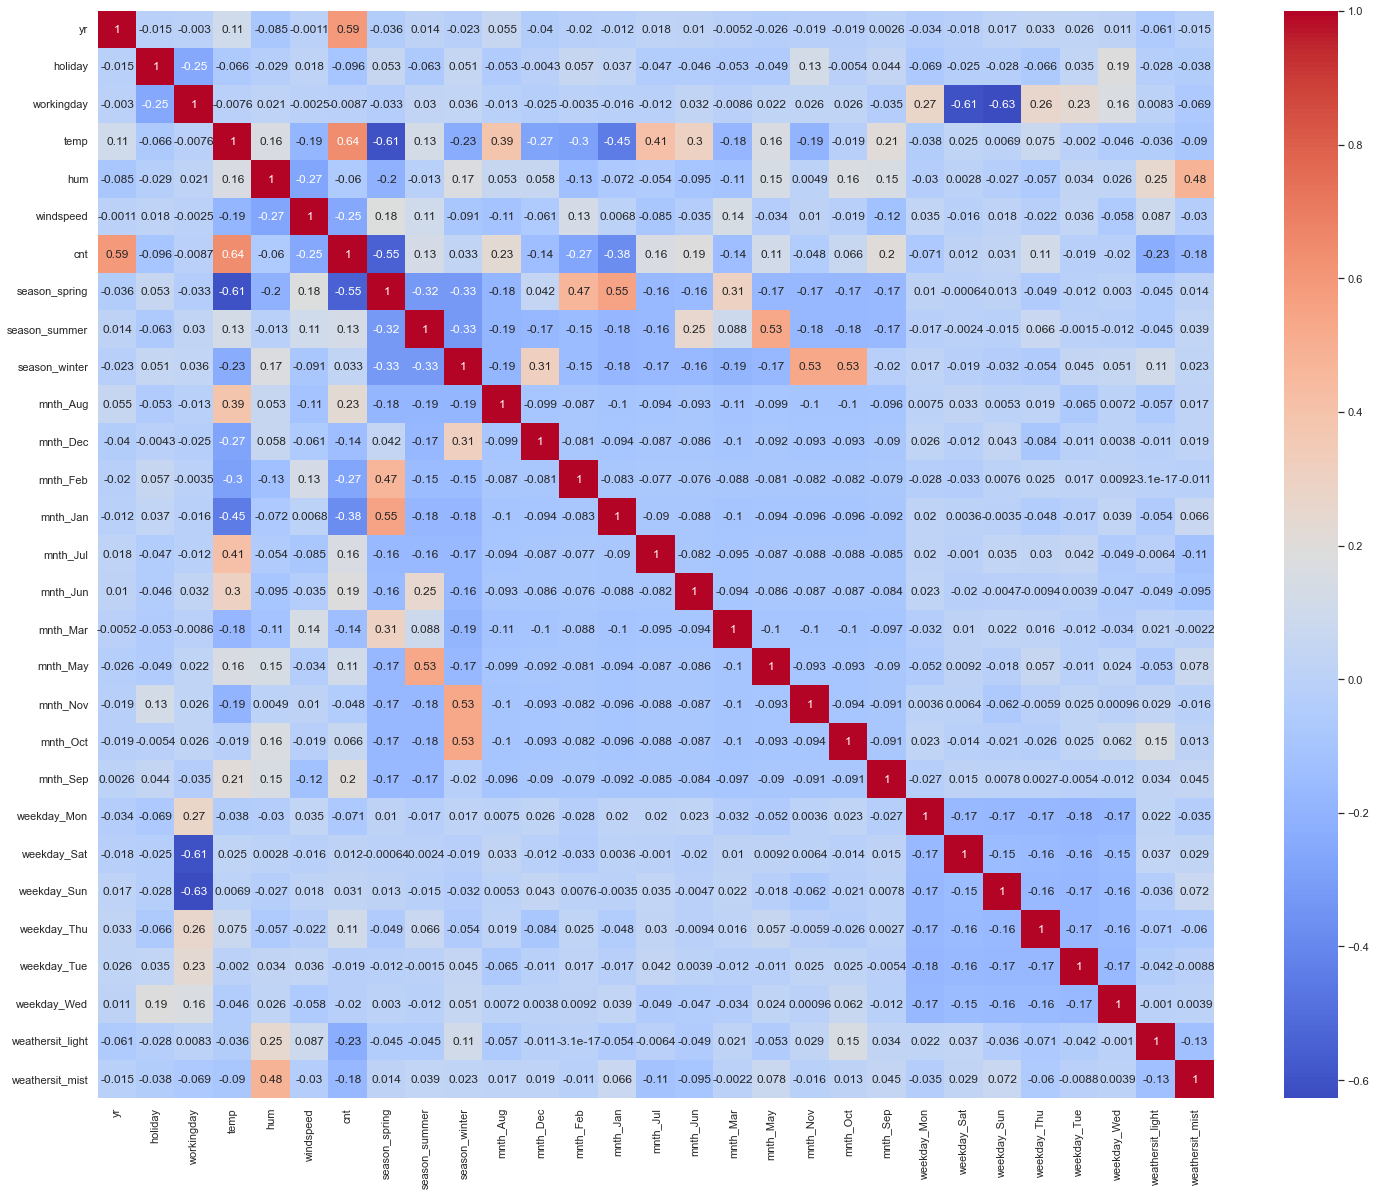

In [ ]:
# Now let us look at the correlation between variables of train set

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm');

#### Inference:
- From above heatmap, we observe that '`cnt`' is highly correlated with '`yr`', '`temp`' and '`season_spring`'.

#### Let us plot a scatter plot between 'cnt' and the numeric variable 'temp' to see this correlation

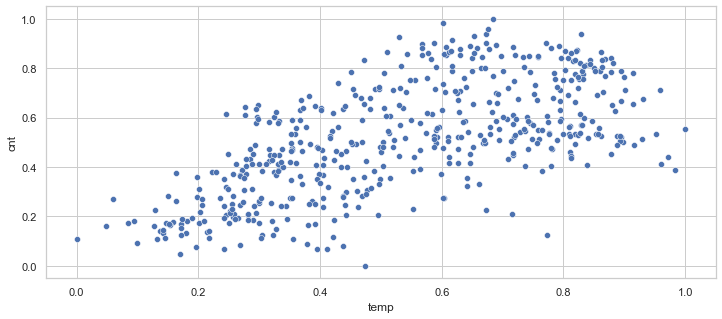

In [ ]:
# Scatter plots of 'cnt' v/s 'temp'

plt.figure(figsize=(12,5))
sns.scatterplot(df_train.temp, df_train.cnt);

## <font color='darkgreen'>Step 5: Building a Linear Model</font>

### <font color=purple>(Method 1: Feature Selection using Backward Selection)</font>

### Creating our feature and response variables

In [ ]:
# Assigning feature variable X and response variable y

y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
# Check the dimensions of training sets

print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


#### First, we build a model using all the variables

In [ ]:
# Check all the columns of dataframe

bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [ ]:
# Build our 1st model

# Add constant
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 1st model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.33e-179
Time:                        17:00:06   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3945      0.085      4.640      0.000       0.227       0.562
yr                   0.2309      0.008     28.387      0.000       0.215       0.247
holiday             -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday          -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                 0.4455      0.047      9.513      0.000       0.353       0.537
hum                 -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed           -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring       -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer        0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter        0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug             0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec            -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb            -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan            -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul            -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun             0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar             0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May             0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov            -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct             0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep             0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon         -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Sat         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sun         -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thu          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tue         -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wed         -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_light    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_mist     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. N

#### Inferences:
- R-squared is quite high (**0.851**).
- But, we will also look at VIF values to decide which variable to drop

#### Checking for VIFs

In [ ]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,63.89
3,temp,43.99
4,hum,41.17
6,season_spring,13.54
8,season_winter,12.51
22,weekday_Sun,12.35
21,weekday_Sat,11.83
7,season_summer,9.84
17,mnth_Nov,7.16
18,mnth_Oct,6.96


#### Inference:
- We get R-squared value of **0.851**
- The variable `workingday` has both high p-value (**0.395**) and very high VIF (**63.89**)
- So, we will first drop `workingday`

In [ ]:
# Dropping variable 'workingday' and updating our 1st model

X = X_train.drop('workingday', axis=1)

In [ ]:
# Build 2nd model

X_train_lm = sm.add_constant(X)

lr2 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.08e-180
Time:                        17:00:06   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     482   BIC:                            -872.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3330      0.045      7.432      0.000       0.245       0.421
yr                   0.2313      0.008     28.495      0.000       0.215       0.247
holiday             -0.0844      0.026     -3.218      0.001      -0.136      -0.033
temp                 0.4470      0.047      9.556      0.000       0.355       0.539
hum                 -0.1565      0.039     -4.030      0.000      -0.233      -0.080
windspeed           -0.1837      0.026     -7.066      0.000      -0.235      -0.133
season_spring       -0.0434      0.030     -1.435      0.152      -0.103       0.016
season_summer        0.0424      0.026      1.604      0.109      -0.010       0.094
season_winter        0.1101      0.028      3.914      0.000       0.055       0.165
mnth_Aug             0.0208      0.034      0.613      0.540      -0.046       0.088
mnth_Dec            -0.0449      0.034     -1.327      0.185      -0.111       0.022
mnth_Feb            -0.0368      0.033     -1.106      0.269      -0.102       0.029
mnth_Jan            -0.0632      0.034     -1.869      0.062      -0.130       0.003
mnth_Jul            -0.0356      0.035     -1.004      0.316      -0.105       0.034
mnth_Jun             0.0003      0.025      0.014      0.989      -0.049       0.050
mnth_Mar             0.0005      0.025      0.019      0.985      -0.048       0.049
mnth_May             0.0234      0.021      1.104      0.270      -0.018       0.065
mnth_Nov            -0.0428      0.037     -1.167      0.244      -0.115       0.029
mnth_Oct             0.0064      0.036      0.176      0.860      -0.065       0.077
mnth_Sep             0.0861      0.032      2.670      0.008       0.023       0.149
weekday_Mon         -0.0247      0.015     -1.696      0.091      -0.053       0.004
weekday_Sat          0.0033      0.015      0.217      0.828      -0.026       0.033
weekday_Sun          0.0096      0.015      0.639      0.523      -0.020       0.039
weekday_Thu          0.0037      0.015      0.250      0.803      -0.026       0.033
weekday_Tue         -0.0260      0.015     -1.776      0.076      -0.055       0.003
weekday_Wed         -0.0104      0.015     -0.684      0.494      -0.040       0.020
weathersit_light    -0.2514      0.027     -9.453      0.000      -0.304      -0.199
weathersit_mist     -0.0592      0.011     -5.622      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       78.384   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.056
Skew:                          -0.769   Prob(JB):                     4.89e-45
Kurtosis:                       5.690   Cond. No.                         35.2
=====================================================

#### Inferences:
- R-squared is same after dropping `workingday` (**0.851**)
- Still there are many variables with high p-values
- But again, we will first look at VIFs

In [ ]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,37.70
2,temp,37.21
5,season_spring,11.88
7,season_winter,11.81
6,season_summer,7.03
17,mnth_Oct,6.44
16,mnth_Nov,6.07
8,mnth_Aug,5.95
12,mnth_Jul,5.35
11,mnth_Jan,5.22


#### Inference:
- The next variable with high VIF (**11.88**) and also having a high p-value (**0.152**) is `season_spring`.
- So, now we rebuild our model by dropping `season_spring`

In [ ]:
# Dropping variable 'season_spring' and updating our 2nd model

X = X.drop('season_spring', axis=1)

In [ ]:
# Build 3rd model

X_train_lm = sm.add_constant(X)

lr3 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 3rd model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.62e-180
Time:                        17:00:07   Log-Likelihood:                 522.34
No. Observations:                 510   AIC:                            -990.7
Df Residuals:                     483   BIC:                            -876.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3067      0.041      7.493      0.000       0.226       0.387
yr                   0.2310      0.008     28.438      0.000       0.215       0.247
holiday             -0.0850      0.026     -3.235      0.001      -0.137      -0.033
temp                 0.4551      0.046      9.790      0.000       0.364       0.546
hum                 -0.1586      0.039     -4.082      0.000      -0.235      -0.082
windspeed           -0.1866      0.026     -7.192      0.000      -0.238      -0.136
season_summer        0.0672      0.020      3.360      0.001       0.028       0.107
season_winter        0.1344      0.023      5.959      0.000       0.090       0.179
mnth_Aug             0.0429      0.030      1.413      0.158      -0.017       0.103
mnth_Dec            -0.0490      0.034     -1.452      0.147      -0.115       0.017
mnth_Feb            -0.0538      0.031     -1.732      0.084      -0.115       0.007
mnth_Jan            -0.0797      0.032     -2.503      0.013      -0.142      -0.017
mnth_Jul            -0.0140      0.032     -0.436      0.663      -0.077       0.049
mnth_Jun             0.0070      0.025      0.281      0.779      -0.042       0.056
mnth_Mar            -0.0109      0.023     -0.466      0.641      -0.057       0.035
mnth_May             0.0219      0.021      1.034      0.301      -0.020       0.064
mnth_Nov            -0.0415      0.037     -1.131      0.258      -0.114       0.031
mnth_Oct             0.0065      0.036      0.179      0.858      -0.065       0.077
mnth_Sep             0.1037      0.030      3.468      0.001       0.045       0.162
weekday_Mon         -0.0256      0.015     -1.757      0.079      -0.054       0.003
weekday_Sat          0.0026      0.015      0.174      0.862      -0.027       0.032
weekday_Sun          0.0098      0.015      0.649      0.517      -0.020       0.039
weekday_Thu          0.0041      0.015      0.274      0.784      -0.025       0.034
weekday_Tue         -0.0263      0.015     -1.793      0.074      -0.055       0.003
weekday_Wed         -0.0103      0.015     -0.676      0.499      -0.040       0.020
weathersit_light    -0.2488      0.027     -9.367      0.000      -0.301      -0.197
weathersit_mist     -0.0587      0.011     -5.572      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       76.224   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.876
Skew:                          -0.755   Prob(JB):                     4.82e-43
Kurtosis:                       5.625   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

#### Inferences:
- R-squared reduces slightly after dropping '`season_spring`' (**0.850**)
- Still there are many variables with high p-values
- But again, we will first look at VIFs

In [ ]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,36.93
3,hum,36.04
6,season_winter,8.10
16,mnth_Oct,6.29
15,mnth_Nov,5.87
7,mnth_Aug,5.24
5,season_summer,4.82
4,windspeed,4.81
11,mnth_Jul,4.79
8,mnth_Dec,4.38


#### Inference:
- The next variable with highest VIF (**6.29**) and also having a high p-value(**0.858**) is `mnth_Oct`.
- So, now we rebuild our model by dropping `mnth_Oct`

In [ ]:
# Dropping variable 'mnth_Oct' and updating our 3rd model

X = X.drop('mnth_Oct', axis=1)

In [ ]:
# Build 4th model

X_train_lm = sm.add_constant(X)

lr4 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 4th model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.56e-181
Time:                        17:00:07   Log-Likelihood:                 522.32
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     484   BIC:                            -882.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3093      0.038      8.103      0.000       0.234       0.384
yr                   0.2309      0.008     28.483      0.000       0.215       0.247
holiday             -0.0847      0.026     -3.233      0.001      -0.136      -0.033
temp                 0.4548      0.046      9.799      0.000       0.364       0.546
hum                 -0.1577      0.039     -4.095      0.000      -0.233      -0.082
windspeed           -0.1866      0.026     -7.198      0.000      -0.238      -0.136
season_summer        0.0652      0.017      3.932      0.000       0.033       0.098
season_winter        0.1368      0.018      7.672      0.000       0.102       0.172
mnth_Aug             0.0399      0.025      1.572      0.117      -0.010       0.090
mnth_Dec            -0.0539      0.020     -2.654      0.008      -0.094      -0.014
mnth_Feb            -0.0569      0.026     -2.189      0.029      -0.108      -0.006
mnth_Jan            -0.0828      0.027     -3.095      0.002      -0.135      -0.030
mnth_Jul            -0.0169      0.028     -0.612      0.541      -0.071       0.037
mnth_Jun             0.0053      0.023      0.231      0.817      -0.040       0.051
mnth_Mar            -0.0132      0.020     -0.675      0.500      -0.052       0.025
mnth_May             0.0209      0.020      1.026      0.305      -0.019       0.061
mnth_Nov            -0.0470      0.020     -2.410      0.016      -0.085      -0.009
mnth_Sep             0.1001      0.022      4.525      0.000       0.057       0.144
weekday_Mon         -0.0256      0.015     -1.756      0.080      -0.054       0.003
weekday_Sat          0.0027      0.015      0.178      0.859      -0.027       0.032
weekday_Sun          0.0098      0.015      0.651      0.515      -0.020       0.039
weekday_Thu          0.0041      0.015      0.277      0.782      -0.025       0.034
weekday_Tue         -0.0264      0.015     -1.798      0.073      -0.055       0.002
weekday_Wed         -0.0103      0.015     -0.675      0.500      -0.040       0.020
weathersit_light    -0.2487      0.027     -9.375      0.000      -0.301      -0.197
weathersit_mist     -0.0587      0.011     -5.586      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       75.663   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.811
Skew:                          -0.750   Prob(JB):                     1.35e-42
Kurtosis:                       5.612   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inferences:
- R-squared remains same **0.850** after dropping '`mnth_Oct`'
- Still there are many variables with high p-values
- But again, we will first look at VIFs

In [ ]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,35.96
3,hum,32.55
4,windspeed,4.67
6,season_winter,4.56
7,mnth_Aug,3.94
5,season_summer,3.75
11,mnth_Jul,3.73
12,mnth_Jun,2.55
10,mnth_Jan,2.53
16,mnth_Sep,2.46


#### Inference:
- Now, there are no variables with ***both high p-value and high VIFs***
- So, next we look for variables with ***high p-value and low VIFs***
- The next variable with a high p-value(**0.859**) and low VIF (**1.81**) is is `weekday_Sat`.
- So, now we rebuild our model by dropping `weekday_Sat`

In [ ]:
# Dropping variable 'weekday_Sat' and updating our 4th model

X = X.drop('weekday_Sat', axis=1)

In [ ]:
# Build 5th model

X_train_lm = sm.add_constant(X)

lr5 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 5th model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.46e-182
Time:                        17:00:07   Log-Likelihood:                 522.30
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     485   BIC:                            -888.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3108      0.037      8.352      0.000       0.238       0.384
yr                   0.2309      0.008     28.512      0.000       0.215       0.247
holiday             -0.0847      0.026     -3.235      0.001      -0.136      -0.033
temp                 0.4549      0.046      9.810      0.000       0.364       0.546
hum                 -0.1581      0.038     -4.113      0.000      -0.234      -0.083
windspeed           -0.1867      0.026     -7.210      0.000      -0.238      -0.136
season_summer        0.0653      0.017      3.941      0.000       0.033       0.098
season_winter        0.1369      0.018      7.684      0.000       0.102       0.172
mnth_Aug             0.0400      0.025      1.575      0.116      -0.010       0.090
mnth_Dec            -0.0540      0.020     -2.663      0.008      -0.094      -0.014
mnth_Feb            -0.0569      0.026     -2.194      0.029      -0.108      -0.006
mnth_Jan            -0.0828      0.027     -3.099      0.002      -0.135      -0.030
mnth_Jul            -0.0168      0.028     -0.609      0.543      -0.071       0.037
mnth_Jun             0.0052      0.023      0.224      0.823      -0.040       0.050
mnth_Mar            -0.0133      0.020     -0.678      0.498      -0.052       0.025
mnth_May             0.0209      0.020      1.026      0.306      -0.019       0.061
mnth_Nov            -0.0471      0.019     -2.418      0.016      -0.085      -0.009
mnth_Sep             0.1001      0.022      4.529      0.000       0.057       0.143
weekday_Mon         -0.0268      0.013     -2.117      0.035      -0.052      -0.002
weekday_Sun          0.0085      0.013      0.645      0.519      -0.017       0.034
weekday_Thu          0.0029      0.013      0.218      0.827      -0.023       0.029
weekday_Tue         -0.0276      0.013     -2.160      0.031      -0.053      -0.002
weekday_Wed         -0.0116      0.013     -0.861      0.389      -0.038       0.015
weathersit_light    -0.2487      0.026     -9.387      0.000      -0.301      -0.197
weathersit_mist     -0.0587      0.010     -5.589      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       75.633   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.416
Skew:                          -0.749   Prob(JB):                     1.00e-42
Kurtosis:                       5.619   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inferences:
- R-squared remains same (**0.850**) after dropping '`weekday_Sat`'
- Still there are many variables with high p-values
- But again, we will first look at VIFs

In [ ]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,35.36
3,hum,32.42
4,windspeed,4.63
6,season_winter,4.52
7,mnth_Aug,3.93
11,mnth_Jul,3.72
5,season_summer,3.71
12,mnth_Jun,2.54
10,mnth_Jan,2.46
16,mnth_Sep,2.46


#### Inference:
- The next variable with high p-value(**0.827**) and low VIF(**1.55**) is `weekday_Thu`.
- So, now we rebuild our model by dropping `weekday_Thu`

In [ ]:
# Dropping variable 'weekday_Thu' and updating our 5th model

X = X.drop('weekday_Thu', axis=1)

In [ ]:
# Build 6th model

X_train_lm = sm.add_constant(X)

lr6 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 6th model

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.35e-183
Time:                        17:00:07   Log-Likelihood:                 522.28
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     486   BIC:                            -894.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3117      0.037      8.443      0.000       0.239       0.384
yr                   0.2310      0.008     28.558      0.000       0.215       0.247
holiday             -0.0848      0.026     -3.246      0.001      -0.136      -0.033
temp                 0.4550      0.046      9.823      0.000       0.364       0.546
hum                 -0.1581      0.038     -4.120      0.000      -0.234      -0.083
windspeed           -0.1867      0.026     -7.220      0.000      -0.238      -0.136
season_summer        0.0655      0.017      3.961      0.000       0.033       0.098
season_winter        0.1370      0.018      7.705      0.000       0.102       0.172
mnth_Aug             0.0400      0.025      1.577      0.115      -0.010       0.090
mnth_Dec            -0.0542      0.020     -2.679      0.008      -0.094      -0.014
mnth_Feb            -0.0567      0.026     -2.190      0.029      -0.108      -0.006
mnth_Jan            -0.0828      0.027     -3.102      0.002      -0.135      -0.030
mnth_Jul            -0.0166      0.028     -0.604      0.546      -0.071       0.037
mnth_Jun             0.0050      0.023      0.217      0.828      -0.040       0.050
mnth_Mar            -0.0133      0.020     -0.678      0.498      -0.052       0.025
mnth_May             0.0208      0.020      1.027      0.305      -0.019       0.061
mnth_Nov            -0.0472      0.019     -2.426      0.016      -0.085      -0.009
mnth_Sep             0.1001      0.022      4.534      0.000       0.057       0.143
weekday_Mon         -0.0278      0.012     -2.342      0.020      -0.051      -0.004
weekday_Sun          0.0075      0.012      0.608      0.543      -0.017       0.032
weekday_Tue         -0.0286      0.012     -2.396      0.017      -0.052      -0.005
weekday_Wed         -0.0125      0.013     -0.989      0.323      -0.037       0.012
weathersit_light    -0.2493      0.026     -9.465      0.000      -0.301      -0.198
weathersit_mist     -0.0588      0.010     -5.614      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       75.900   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.009
Skew:                          -0.752   Prob(JB):                     7.44e-43
Kurtosis:                       5.621   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inferences:
- R-squared remains same (**0.850**) after dropping '`weekday_Thu`'
- Still there are few variables with high p-values
- So we also look at VIFs

In [ ]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,35.13
3,hum,32.33
4,windspeed,4.63
6,season_winter,4.49
7,mnth_Aug,3.93
11,mnth_Jul,3.72
5,season_summer,3.67
12,mnth_Jun,2.54
16,mnth_Sep,2.46
10,mnth_Jan,2.44


#### Inference:
- We observe that from the 3rd model onwards, ***R-squared is remaining the same, 0.850***
- Now, if we keep on removing more variables, it doesn't impact the R-squared of model very much
- Hence, we can stop our exercise and **accept our 6th model 'lr6'**, which explains **85%** variation of the data

## <font color='darkgreen'>Step 6: Residual Analysis</font>

#### <font color=purple>(Method 1: Backward Selection)</font>

In [ ]:
# Predicting on our train set

y_train_pred = lr6.predict(X_train_lm)

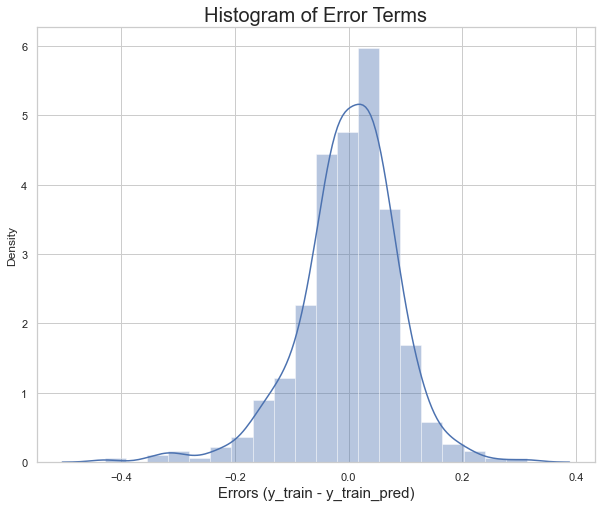

In [ ]:
# Plotting histogram of residuals (error terms) to validate assumption 2

plt.figure(figsize=(10,8))
Errors = y_train - y_train_pred
sns.distplot(Errors, bins=20)
plt.title("Histogram of Error Terms", fontsize=20)
plt.xlabel("Errors (y_train - y_train_pred)", fontsize=15);


#### Validation of Assumption 2:
- From above histogram and calculation, we observe that ***error terms/residuals are normally distributed with mean approximately zero***
- Thus, our model will be good to make ***inferences*** on our 'bikes' dataset. Note that we wanted to know which variables are significant in predicting the demand for bikes.
- This also means that the p-values obtained in our model are reliable.

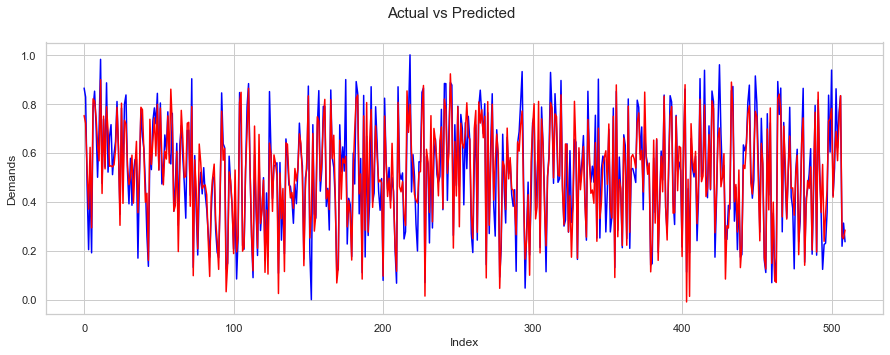

In [ ]:
 #Actual vs Predicted
c=[i for i in range(0,len(X_train),1)]
plt.figure(figsize=(15,5))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Inference :
Actual and Predicted result following almost the same pattern so this model seems ok

In [ ]:
# Calculate the mean or error terms

print(np.mean(Errors))

-1.6898247507162308e-16


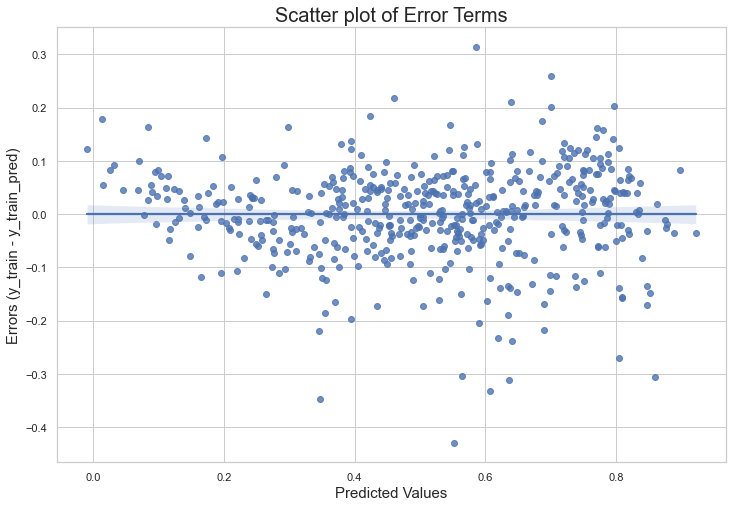

In [ ]:
# Plotting scatter plot to validate assumptions 3 & 4

plt.figure(figsize=(12,8))
sns.regplot(y_train_pred, Errors)
plt.title("Scatter plot of Error Terms", fontsize=20)
plt.ylabel("Errors (y_train - y_train_pred)", fontsize=15)
plt.xlabel("Predicted Values", fontsize=15);

#### Validation of Assumption 3:
- From above scatterplot, we observe that there is no discernible pattern
- Thus, we can conclude that ***error terms/residuals are independent of each other***

#### Validation of Assumption 4:
- We also observe from above scatter plot that the variation of data points is not increasing significantly.
- Thus, we can conclude that our ***error terms have constant variance (homoscedasticity)***

## <font color='darkgreen'>Step 7: Making Predictions</font>
#### <font color=purple>(Method 1: Backward Selection)</font>

In [ ]:
# Scaling test data using the same columns used while scaling train data

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
# Verify that all the variables are scaled

df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing Test data into X and y

In [ ]:
# Creating response variable y and predictor variable X from test data

y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Check the dimensions

print(X_test.shape)
print(y_test.shape)

(219, 28)
(219,)


In [ ]:
# Adding constant

X_test_sm = sm.add_constant(X_test)

In [ ]:
# Dropping the variables that we dropped from training data

X_test_sm = X_test_sm.drop(['workingday', 'season_spring', 'mnth_Oct', 'weekday_Sat', 'weekday_Thu'], axis=1)


In [ ]:
### Making predictions

y_test_pred = lr6.predict(X_test_sm)

## <font color='darkgreen'>Step 8: Model Evaluation</font>
#### <font color=purple>(Method 1: Backward Selection)</font>

In [ ]:
# Evaluate the model

r2 = r2_score(y_test, y_test_pred)
r2

0.8220339339905396

In [ ]:
# Next calculate adjusted R-squared using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]    # No. of rows of test data
p = X_test.shape[1]    # No. of columns of test data

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.795807355841777

#### Inference:
- In our 6th model on training set, we got an R-squared of **0.850** and an adjusted R-squared of **0.843**
- The same model gives an R-squared of **0.822** on test set and adjusted R-squared of **0.796**.
- Thus, our model is working almost same on training as well as test data. It is not underfitting or overfitting.
- The value of probability of F-statistic is **1.35e-183** which is very low.
- If we would have started with **Null Hypothesis** that `all coefficients are zero` , then from summary of our 6th model, we see that `none of the coeeficients is zero`.  Thus, we reject our null hypothesis in favour of **Alternate Hypothesis** that our `model is statistically significant`.
- Hence, we conclude that our prediction model is significant.


- Our final Linear Regression equation takes the form:

## $cnt = 0.3117 + (0.4550 * temp) - (0.2493 * weathersit\_light) + (0.2310 * yr) - (0.1867 * windspeed) - (0.1581 * hum) + (0.1370 * season\_winter)  + ...... $

## <font color='brown'>Summary to be provided to BoomBikes Company</font>

1. The variables significant in predicting the demand for shared bikes are the ones having near to zero p-values:

   - `yr`: whether the year is 2018 or 2019
   - `holiday`: whether day is a holiday or not
   - `temp`: temperature in Celsius
   - `hum`: humidity on a given day
   - `windspeed`: wind speed on a given day
   - `season_summer`: whether it is summer season or not
   - `season_winter`: whether it is winter season or not
   - `mnth_Sep`: whether it is month of September or not
   - `weathersit_light`: whether the weather is Light Snow / (Light Rain + Thunderstorm + Scattered clouds) or (Light Rain + Scattered clouds)



2. The extent to which these variables describe the bike demand (we'll see the **top 5 variables** that affect the demand the most):

   - `temp`: a 1 degree celsius increase in temperature leads to increase in rental bikes of **0.4550** units
   - `weathersit_light`: if the weather is Light Snow / (Light Rain + Thunderstorm + Scattered clouds) or (Light Rain + Scattered clouds), then number of rental bikes decreases by **0.2493** units
   - `yr`: if the year is 2019 instead of 2018, the number of rental bikes increases by **0.2310** units
   - `windspeed`: if the windspeed will increase by 1 unit, the number of rental bikes will decrease by **0.1876** units
   - `hum`: if the humidity will increase by 1 unit, the number of rental bikes will decrease by **0.1581** units
   

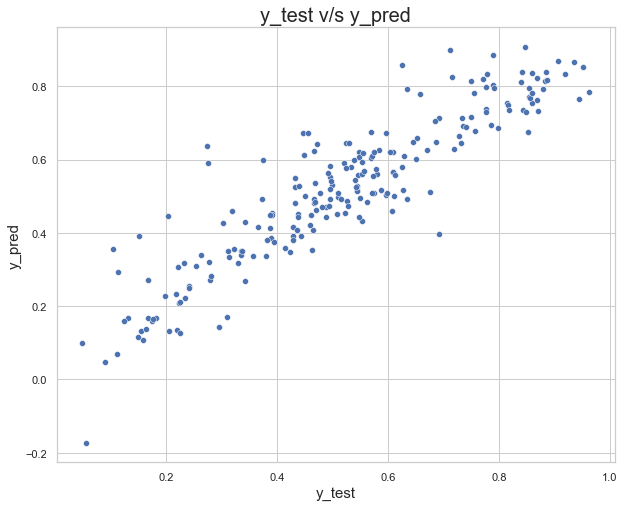

In [ ]:
# Plot scatter plot between y_test and y_test_pred

plt.figure(figsize=(10,8))
sns.scatterplot(y_test, y_test_pred)
plt.title("y_test v/s y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=15)
plt.ylabel("y_pred", fontsize=15);


In [ ]:
#Plot Actual vs Predicted for Test Data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts', fontsize=16)


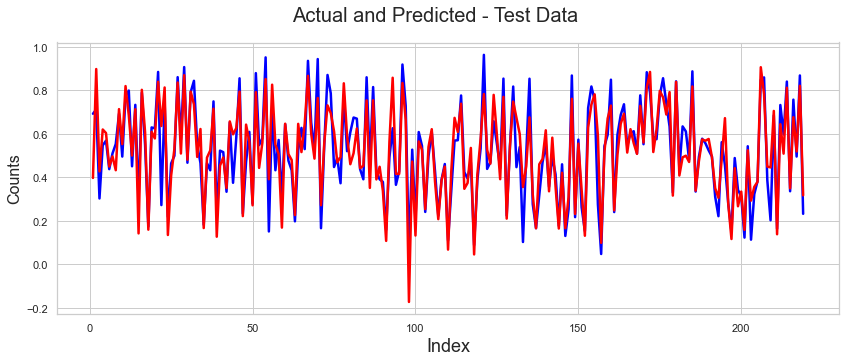

In [ ]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Inference
As we can see predictions for test data is very close to actuals

## <font color='darkgreen'>Step 5: Building a Linear Model</font>

## <font color=purple>Method 2: Feature Selection using RFE (Recursive Feature Elimination)</font>

In [ ]:
# Instantiating a class for LinearRegression

lm = LinearRegression()

In [ ]:
# Running RFE with the output number of the variable equal to 10

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Look at columns and their ranking given by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 15),
 ('weathersit_light', True, 1),
 ('weathersit_mist', False, 2)]

In [ ]:
# The 10 columns selected by RFE method

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_light'],
      dtype='object')

In [ ]:
# Show columns not selected by RFE method

X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_mist'],
      dtype='object')

### Building model using statsmodels

In [ ]:
# Create train set by only the columns selected by RFE

X_train_rfe = X_train[col]

# Add constant
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.53e-184
Time:                        17:00:10   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3769      0.031     12.133      0.000       0.316       0.438
yr                   0.2281      0.008     27.102      0.000       0.212       0.245
holiday             -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                 0.5147      0.031     16.542      0.000       0.454       0.576
hum                 -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed           -0.1887      0.026     -7.194      0.000      -0.240      -0.137
season_spring       -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_winter        0.0653      0.013      5.153      0.000       0.040       0.090
mnth_Jul            -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_Sep             0.0598      0.016      3.723      0.000       0.028       0.091
weathersit_light    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference:
- We get quite a good R-squared of **0.830**
- We see from summary that all p-values are very low.
- So, we will have to check for VIFs

In [ ]:
# Checking VIFs

X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_Jul,1.40
8,mnth_Sep,1.20
9,weathersit_light,1.11
1,holiday,1.04


In [ ]:
# Now we first drop the variable 'hum' as it has the highest VIF (15.18)

X = X.drop(['hum'], axis=1)

# Add constant
X_train_lm = sm.add_constant(X)

lm2 = sm.OLS(y_train, X_train_lm).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.33e-171
Time:                        17:00:10   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2042      0.025      8.095      0.000       0.155       0.254
yr                   0.2350      0.009     26.233      0.000       0.217       0.253
holiday             -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp                 0.4758      0.033     14.453      0.000       0.411       0.540
windspeed           -0.1325      0.027     -4.879      0.000      -0.186      -0.079
season_spring       -0.1032      0.016     -6.274      0.000      -0.136      -0.071
season_winter        0.0504      0.013      3.754      0.000       0.024       0.077
mnth_Jul            -0.0616      0.019     -3.272      0.001      -0.099      -0.025
mnth_Sep             0.0498      0.017      2.911      0.004       0.016       0.083
weathersit_light    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inferences:
- The R-squared decreases slightly to **0.805**
- All the p-values are very low
- Again, we check for VIF values

In [ ]:
# Checking VIFs again

X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_Jul,1.34
7,mnth_Sep,1.20
8,weathersit_light,1.06
1,holiday,1.04


#### Inference:
- We observe that in our 2nd model, ***all p-values of coefficients are very low***, hence all the coefficients are significant.
- Also, ***all the VIF values are less than 5***.
- Hence, we accept this 2nd model '**lm2**', which explains **80.5 %** variation of the data.

## <font color='darkgreen'>Step 6: Residual Analysis</font>

#### <font color=purple>(Method 2: RFE)</font>

In [ ]:
# Predicting on our train set

y_train_pred = lm2.predict(X_train_lm)

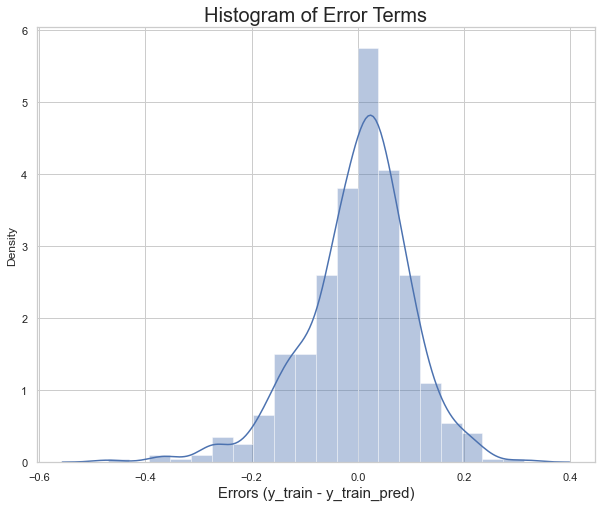

In [ ]:
# Plotting histogram of residuals (error terms) to valiate assumption 2

plt.figure(figsize=(10,8))
Errors = y_train - y_train_pred
sns.distplot(Errors, bins=20)
plt.title("Histogram of Error Terms", fontsize=20)
plt.xlabel("Errors (y_train - y_train_pred)", fontsize=15);


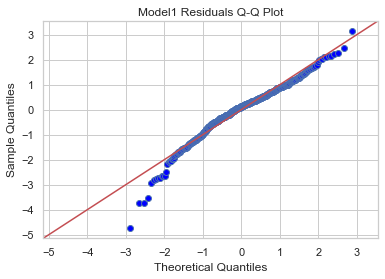

In [ ]:
#Residual Q-Q plot
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.title("Model1 Residuals Q-Q Plot")
plt.show()

The above graph is a decent proof that the Residual error is normally distributed.

#### Validation of Assumption 2:
- From above histogram, we observe that ***error terms/residuals are normally distributed with mean approximately zero***
- Thus, our model will be good to make ***inferences*** on our 'bikes' dataset. Note that we wanted to know which variables are significant in predicting the demand for bikes.
- This also means that the p-values obtained in our model are reliable.

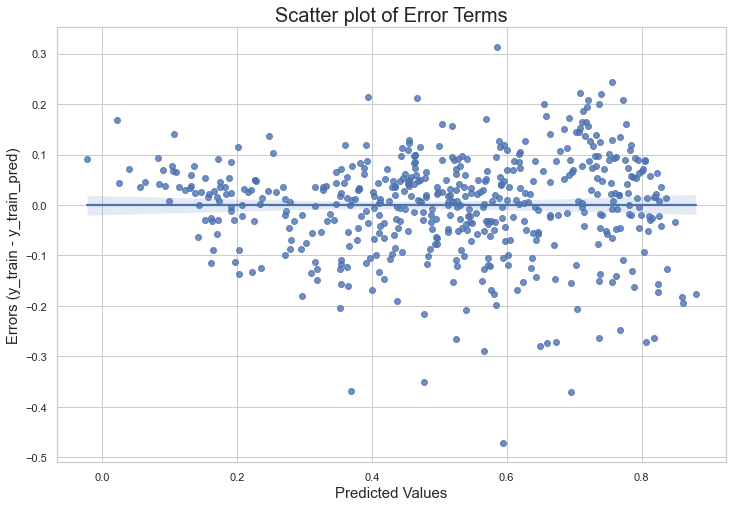

In [ ]:
# Plotting scatter plot to validate assumptions 3 & 4

plt.figure(figsize=(12,8))
sns.regplot(y_train_pred, Errors)
plt.title("Scatter plot of Error Terms", fontsize=20)
plt.ylabel("Errors (y_train - y_train_pred)", fontsize=15)
plt.xlabel("Predicted Values", fontsize=15);

#### Validation of Assumption 3:
- From above scatterplot, we observe that there is no discernible pattern
- Thus, we can conclude that ***error terms/residuals are independent of each other***

#### Validation of Assumption 4:
- We also observe from above scatter plot that the variation of data points is not increasing significantly.
- Thus, we can conclude that our ***error terms have constant variance (homoscedasticity)***

## <font color='darkgreen'>Step 7: Making Predictions</font>
#### <font color=purple>(Method 2: RFE)</font>

#### We already have our test data divided into X_test and y_test

In [ ]:
# Check the dimensions of test data

print(X_test.shape)
print(y_test.shape)

(219, 28)
(219,)


In [ ]:
# Selecting all the variables/columns that were selected while builiding model on training set
X_test_new = X_test[X_train_new.columns]

# Add constant
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions

y_test_pred = lm2.predict(X_test_new)

## <font color='darkgreen'>Step 8: Model Evaluation</font>
#### <font color=purple>(Method 2: RFE)</font>

In [ ]:
# Evaluate the model: First calculate R-squared

r2 = r2_score(y_test, y_test_pred)
r2

0.7888115946045293

In [ ]:
# Next calculate adjusted R-squared using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]    # No. of rows of test data
p = X_test.shape[1]    # No. of columns of test data

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7576890927567758

#### Inference:
- In our 2nd model on training set, we got an R-squared of **0.805** and an adjusted R-squared of **0.801**
- The same model gives an R-squared of **0.788** on test set and an adjusted R-squared of **0.758**
- The value of probability of F-statistic is **5.33e-171** which is very low.
- If we would have started with **Null Hypothesis** that `all coefficients are zero` , then from summary of our 2nd model, we see that `none of the coeeficients is zero`.  Thus, we reject our null hypothesis in favour of **Alternate Hypothesis** that our `model is statistically significant`.
- Hence, we conclude that our prediction model is significant.


- Our final Linear Regression equation takes the form:

##  $cnt = 0.2042 + (0.4758 * temp) - (0.2562 * weathersit\_light) + (0.2350 * yr) - (0.1325 * windspeed) - (0.1032 * season\_winter) + ...... $

## <font color='brown'>Summary to be provided to BoomBikes Company</font>

1. The variables significant in predicting the demand for shared bikes are the ones having near to zero p-values:

   - `yr`: whether the year is 2018 or 2019
   - `holiday`: whether day is a holiday or not
   - `temp`: temperature in Celsius
   - `windspeed`: wind speed on a given day
   - `season_spring`: whether it is spring season or not
   - `season_winter`: whether it is winter season or not
   - `mnth_Jul`: whether it is month of Jul or not
   - `mnth_Sep`: whether it is month of September or not
   - `weathersit_light`: whether the weather is Light Snow / (Light Rain + Thunderstorm + Scattered clouds) or (Light Rain + Scattered clouds)



2. The extent to which these variables describe the bike demand (we'll see the **top 5 variables** that affect the demand the most):

   - `temp`: a 1 degree celsius increase in temperature leads to increase in rental bikes of **0.4758** units
   - `weathersit_light`: if the weather is Light Snow / (Light Rain + Thunderstorm + Scattered clouds) or (Light Rain + Scattered clouds), then number of rental bikes decreases by **0.2562** units
   - `yr`: if the year is 2019 instead of 2018, the number of rental bikes increases by **0.2350** units
   - `windspeed`: if the windspeed will increase by 1 unit, the number of rental bikes will decrease by **0.1325** units
   - `season_winter`: if the season will be winter, the number of rental bikes will decrease by **0.1032** units
   

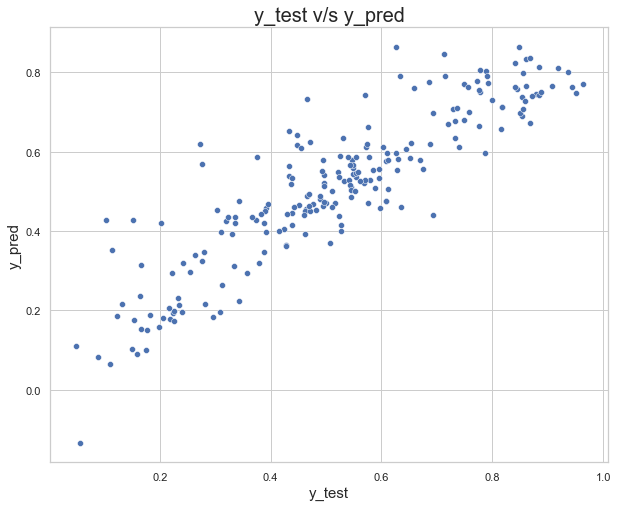

In [ ]:
# Plot scatter plot between y_test and y_test_pred

plt.figure(figsize=(10,8))
sns.scatterplot(y_test, y_test_pred)
plt.title("y_test v/s y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=15)
plt.ylabel("y_pred", fontsize=15);


### Conclusion:
- Both our final models obtained from ***Backward Selection** as well as **RFE** feature selection methods are significant.
- The common variables significant in predicting demand for sharde bikes are:
> '`temp`'  
'`weathersit_light`'  
'`yr`' and   
'`windspeed`'
- These can be suggested to BoomBikes company as the factors most affecting the demand for rental bikes.